## PAGE 9
## EXERCISE 1.1    
### PART a

In [7]:
# Vector b contains the coefficients of x[n]
# Vector a contains the coefficients of y[n]
import numpy as np
b = np.array([0.3, 0.6, 0.3])
a = np.array([1, 0, 0.9])
print("b =",b)
print("a =",a)

b = [0.3 0.6 0.3]
a = [1.  0.  0.9]


### PART c

imp = [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


<StemContainer object of 3 artists>

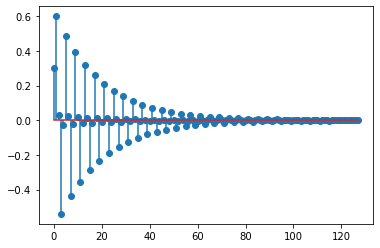

In [8]:
from scipy import signal
import scipy as sp
import matplotlib.pyplot as plt
imp = np.zeros(128)
imp[0] = 1
print("imp =",imp)

def my_filter(b, a, x):
    y = np.zeros(shape = len(x))
    y[0] = b[0]*x[0]
    y[1] = b[0]*x[1] + b[1]*x[0]
    for i in range(2,len(x)):
        y[i] = (b[0]*x[i] + b[1]*x[i-1] + b[2]*x[i-2] - a[1]*y[i-1] - a[2]*y[i-2])/a[0]
    return y

y = my_filter(b, a, imp)
plt.stem(y)

<StemContainer object of 3 artists>

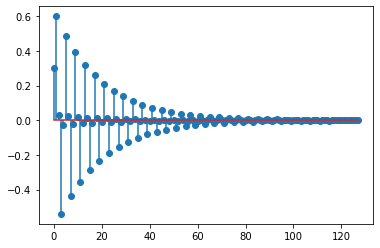

In [4]:
y1 = sp.signal.lfilter(b, a, imp)
plt.stem(y1)

We can see that the above answers (without and with sp.signal.lfilter) are the same.

## EXERCISE 1.2
### PART a

b = [1.  0.5]
a = [ 1.        -1.7654135  0.81     ]
imp = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<StemContainer object of 3 artists>

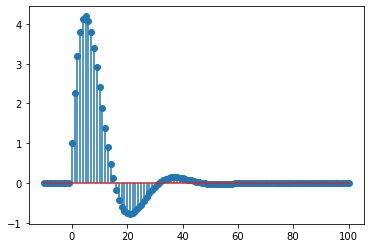

In [5]:
b = np.array([1, 0.5])
a = np.array([1, -1.8* np.cos(np.pi/16), 0.81])
print("b =",b)
print("a =",a)

imp = np.zeros(111)
imp[10] = 1
print("imp =",imp)
y = sp.signal.lfilter(b, a, imp)
xpoints = np.arange(111) - 10
plt.stem(xpoints, y)


## PAGE 16
## EXERCISE 1.1
### PART b

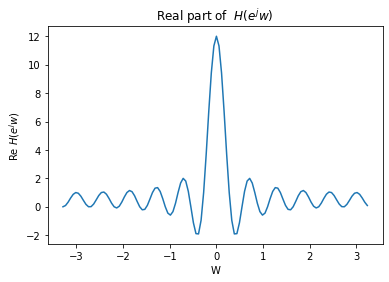

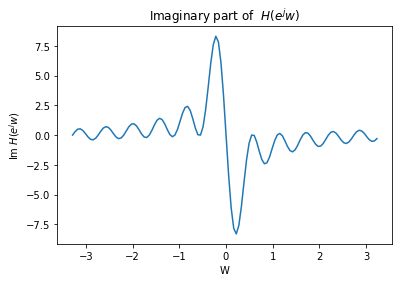

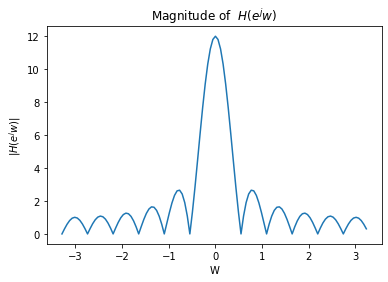

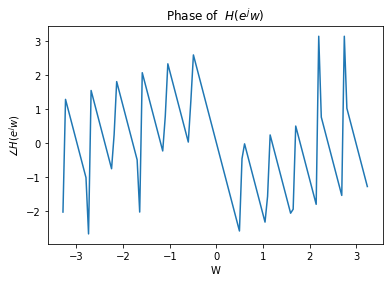

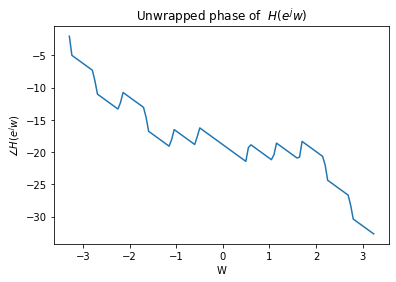

In [49]:
h = np.ones(12)
N = 120
def dtft(h,N):
    """
    calculate DTFT at N equally spaced frequencies
    usage: H = dtft(h, N)
    h: finite-length input vector, whose length is L
    N: number of frequencies for evaluation over [fpi,pi)
    ==> constraint: N >= L
    H: DTFT values (complex)
    W: (2nd output) vector of freqs where DTFT is computed
    """
    L = len(h)
    if N<L :
        print("DTFT: # data samples cannot exceed # freq samples")
    else :
        W = 2* np.pi/ N* np.arange(N)
        W = np.transpose(W)
        
        mid = int(np.ceil(N/2))
        W[mid:N] = W[mid:N] - 2* np.pi
        
        W = my_fftshift(W)
        H = my_fftshift( np.fft.fft( h, N ) )
    
    return [W,H]

def my_fftshift(X):
    mid = np.int(np.ceil(len(X)/ 2))
    X1 = X[:mid]
    X2 = X[mid:]
    Xshift = np.concatenate((X2, X1))
    return Xshift

[W,H] = dtft(h,N)
W1 = W/ len(h)* 4* np.pi

plt.plot(W1, H.real)
plt.xlabel('W')
plt.ylabel('Re $H(e^jw)$')
plt.title('Real part of  $H(e^jw)$');
plt.show()

plt.plot(W1, H.imag )
plt.xlabel('W')
plt.ylabel('Im $H(e^jw)$')
plt.title('Imaginary part of  $H(e^jw)$')
plt.show()

plt.plot(W1, abs(H))
plt.xlabel('W')
plt.ylabel('$|H(e^jw)|$')
plt.title('Magnitude of  $H(e^jw)$');
plt.show()

plt.plot(W1, np.angle(H))
plt.xlabel('W')
plt.ylabel('$∠H(e^jw)$')
plt.title('Phase of  $H(e^jw)$');
plt.show()

plt.plot(W1, np.unwrap(np.angle(H)))
plt.xlabel('W')
plt.ylabel('$∠H(e^jw)$')
plt.title('Unwrapped phase of  $H(e^jw)$');
plt.show()




### PART c

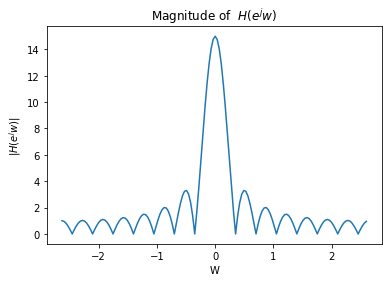

The peak height = 15.0


In [50]:
hc = np.ones(15)
Nc = 150

[Wc,Hc] = dtft(hc,Nc)
W1c = Wc/len(hc)* 4* np.pi

plt.plot(W1c, abs(Hc))
plt.xlabel('W')
plt.ylabel('$|H(e^jw)|$')
plt.title('Magnitude of  $H(e^jw)$');
plt.show()

print("The peak height =",abs(Hc[75]))



## EXERCISE 1.2

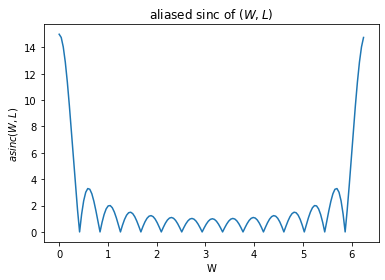

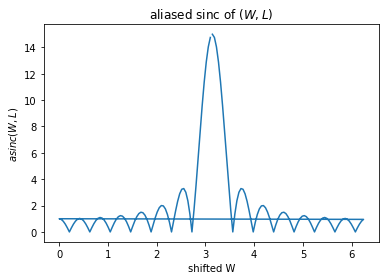

In [57]:
hc = np.ones(15)
Nc = 150
W = 2* np.pi* np.arange(Nc)/Nc
L = 15
def asinc(W, L):
    out = np.zeros(len(W))
    for i in range (len(W)):
        if W[i] != 0:
            out[i] = np.sin(W[i]*L/2)/ np.sin(W[i]/2)
        out[0] = L
    return out
out =  asinc(W, L)
plt.plot(W, abs(out))
plt.xlabel('W')
plt.ylabel('$asinc(W, L)$')
plt.title('aliased sinc of $(W, L )$');
plt.show()

# Now we shift the vector W
WW = my_fftshift(W)
plt.plot(WW, abs(out))
plt.xlabel('shifted W')
plt.ylabel('$asinc(W, L)$')
plt.title('aliased sinc of $(W, L )$');
plt.show()

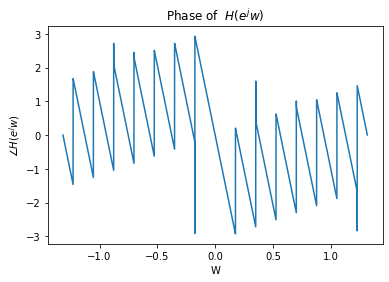

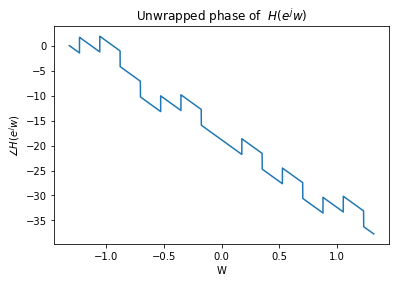

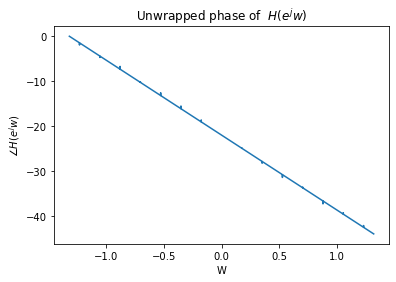

In [60]:
hc = np.ones(15)
Nc = 15000

[Wc,Hc] = dtft(hc,Nc)
W1c = Wc/len(hc)*2*np.pi

plt.plot(W1c, np.angle(Hc))
plt.xlabel('W')
plt.ylabel('$∠H(e^jw)$')
plt.title('Phase of  $H(e^jw)$');
plt.show()

plt.plot(W1c, np.unwrap(np.angle(Hc)))
plt.xlabel('W')
plt.ylabel('$∠H(e^jw)$')
plt.title('Unwrapped phase of  $H(e^jw)$');
plt.show()

# If we add a coefficient, we can see the line better
plt.plot(W1c, np.unwrap(4 * np.angle(Hc)) / 4)
plt.xlabel('W')
plt.ylabel('$∠H(e^jw)$')
plt.title('Unwrapped phase of  $H(e^jw)$');
plt.show()


## EXERCISE 3.1
### PART a

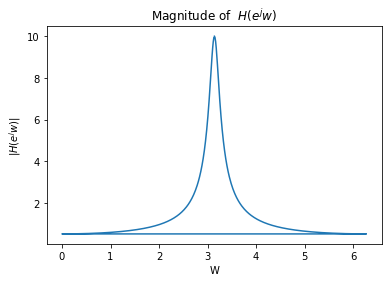

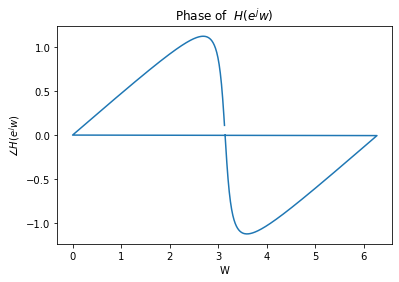

In [99]:
b = 1
a = np.array([1, -0.9])
W, X = sp.signal.freqz(b, a,  whole= True)

Wshift = np.zeros(len(W))
Xshift = np.zeros(len(X))

Wshift = my_fftshift(W)

plt.plot(Wshift, abs(X))
plt.xlabel('W')
plt.ylabel('$|H(e^jw)|$')
plt.title('Magnitude of  $H(e^jw)$');
plt.show()

plt.plot(Wshift, np.angle(X))
plt.xlabel('W')
plt.ylabel('$∠H(e^jw)$')
plt.title('Phase of  $H(e^jw)$');
plt.show()


The signal $x[n]$ is real so $X(exp(jw)) = X^*(exp(-jw))$ and we can see that the
magnitude is even and the phase is an odd function of $w$

## EXERCISE 4.2
### PART a

theta = 1.1284933947861842


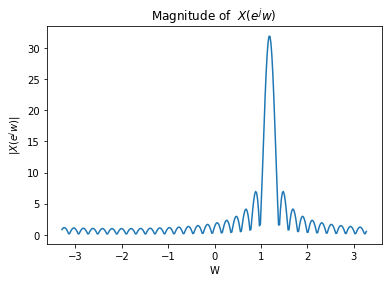

In [112]:
import math

theta = 2* np.pi/ math.sqrt(31)
print("theta =",theta)
L = 32
r = np.ones(L)
x = r* np.exp(theta* 1j* np.arange(L))
N = 320
W, X = dtft(x, N)

W1 = W/ len(h)* 4* np.pi

plt.plot(W1, abs(X))
plt.xlabel('W')
plt.ylabel('$|X(e^jw)|$')
plt.title('Magnitude of  $X(e^jw)$');
plt.show()


### PART b

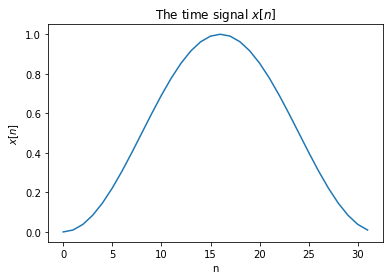

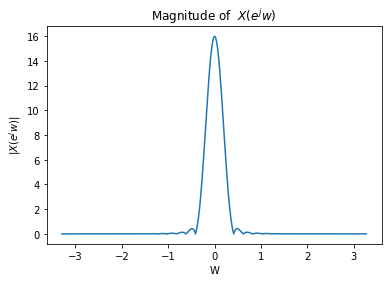

In [113]:
hann = 1/2 - 1/2* np.cos(2* np.pi/ L* np.arange(L))
r = np.ones(L)
x = r* hann
N = 320
W, X = dtft(x, N)

W1 = W/ len(h)* 4* np.pi

plt.plot(np.arange(L), x)
plt.xlabel('n')
plt.ylabel('$x[n]$')
plt.title('The time signal $x[n]$');
plt.show()

plt.plot(W1, abs(X))
plt.xlabel('W')
plt.ylabel('$|X(e^jw)|$')
plt.title('Magnitude of  $X(e^jw)$');
plt.show()

## PAGE 30
## EXERCISE 1.1
### PART a

duration = 10.0 ms ,number of samples = 80.0 and initial phase = 0


Text(0.5, 1.0, 'The time signal $x[n]$')

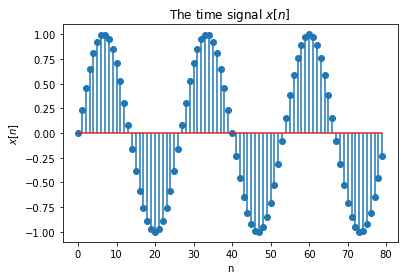

In [29]:
fs = 8000
f0 = 300
duration = 10**(-2)
N = duration* fs
print("duration =",duration*1000,"ms",",number of samples =",N,"and initial phase = 0")
x = np.sin(2* np.pi* f0/ fs* np.arange(N))

plt.stem(x)
plt.xlabel('n')
plt.ylabel('$x[n]$')
plt.title('The time signal $x[n]$')

### PART b

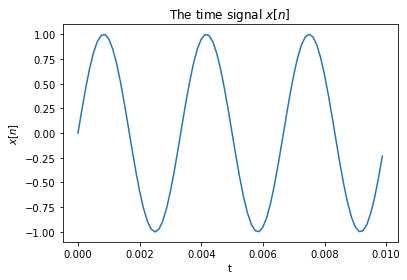

In [30]:
plt.plot( np.arange(N)/80 * 0.01,x)
plt.xlabel('t')
plt.ylabel('$x[n]$')
plt.title('The time signal $x[n]$');

### PART c

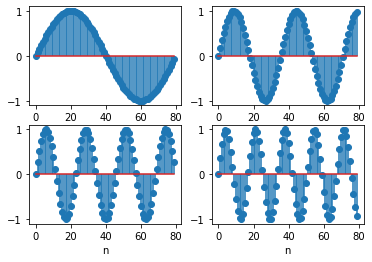

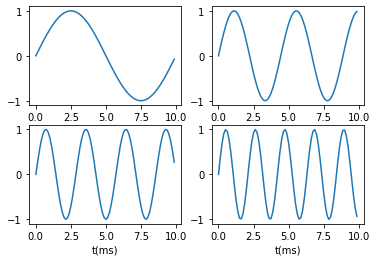

In [43]:
f0 = np.arange(100,476,125)
fs = 8000
duration = 10**(-2)
N = duration* fs

for i in range (4):
    
    x = np.sin(2* np.pi* f0[i]/ fs* np.arange(N))
    plt.subplot(2,2,i+1)
    plt.stem(x)
    plt.xlabel("n")
plt.show()
for i in range (4):
    
    x = np.sin(2* np.pi* f0[i]/ fs* np.arange(N))
    plt.subplot(2,2,i+1)
    plt.plot(np.arange(N)/80 * 10,x)
    plt.xlabel("t(ms)")
plt.show()

### PART d

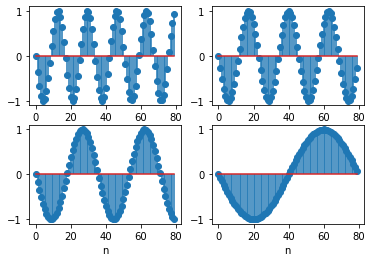

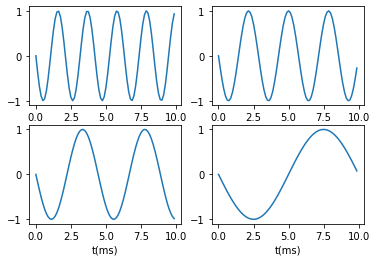

In [44]:
f0 = np.arange(7525,7901,125)
fs = 8000
duration = 10**(-2)
N = duration* fs

for i in range (4):
    
    x = np.sin(2* np.pi* f0[i]/ fs* np.arange(N))
    plt.subplot(2,2,i+1)
    plt.stem(x)
    plt.xlabel("n")
plt.show()
for i in range (4):
    
    x = np.sin(2* np.pi* f0[i]/ fs* np.arange(N))
    plt.subplot(2,2,i+1)
    plt.plot(np.arange(N)/80 * 10,x)
    plt.xlabel("t(ms)")
plt.show()

$x[n] = sin(2 \pi f0/ fs* n)$ and $fs = 8000 Hz$ so we can see that $sin(2 \pi*7900/ 8000* n) = sin(2 \pi n - 2 \pi* 100/ 8000* n) = -sin(2 \pi* 100/ 8000* n)$ so when the frequency of the sine wave is 7900 Hz the signal is the same as sine wave with frequecy = 100 Hz, therefore increasing the sinusoidal frequency from 7525 to 7900 Hz, is just like decreasing it from 475 to 100.

### PART e

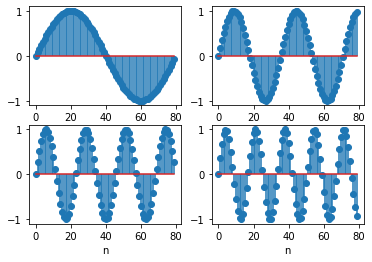

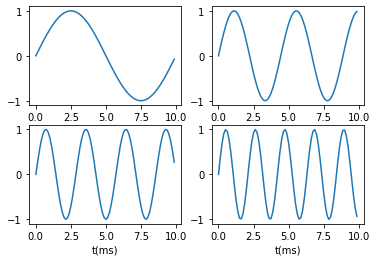

In [45]:
f0 = np.arange(32100,32476,125)
fs = 8000
duration = 10**(-2)
N = duration* fs

for i in range (4):
    
    x = np.sin(2* np.pi* f0[i]/ fs* np.arange(N))
    plt.subplot(2,2,i+1)
    plt.stem(x)
    plt.xlabel("n")
plt.show()
for i in range (4):
    
    x = np.sin(2* np.pi* f0[i]/ fs* np.arange(N))
    plt.subplot(2,2,i+1)
    plt.plot(np.arange(N)/80 * 10,x)
    plt.xlabel("t(ms)")
plt.show()

 $sin(2 \pi*32100/ 8000* n) = sin(8 \pi n + 2 \pi* 100/ 8000* n) = sin(2 \pi* 100/ 8000* n)$ so part c and e are exactly the same.